# CLUSTERING THE NUMBER OF DRUG SEIZURE AND ARREST IN NIGERIA (2018)

data from https://nigerianstat.gov.ng/elibrary/read/1145

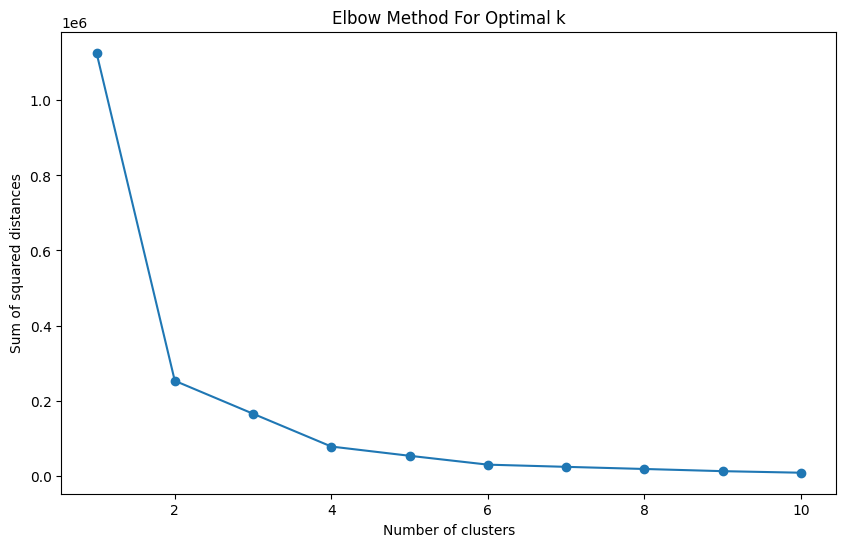

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings
import matplotlib.pyplot as plt


# Suppress warnings
warnings.filterwarnings('ignore')

# Load data (assuming CSV file)
data = pd.read_csv('clu.csv')

# Data preprocessing
data = data[data['STATE'].apply(lambda x: x.isalpha())]  # Keep only alphabetic state names

# Selecting features
features = data[['MALE', 'FEMALE']]

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

Listing states in each cluster:
Cluster 0: Adamawa, Anambra, Bayelsa, Benue, Delta, Ebonyi, Edo, Ekiti, Enugu, Gombe, Imo, Kaduna, Kebbi, Kogi, Kwara, Lagos, Nassarawa, Niger, Ogun, Ondo, Osun, Oyo, Rivers, Sokoto, Taraba, Yobe, Zamfara, FCT
Cluster 1: Abia, Bauchi, Borno, Jigawa, Kano, Katsina, Plateau


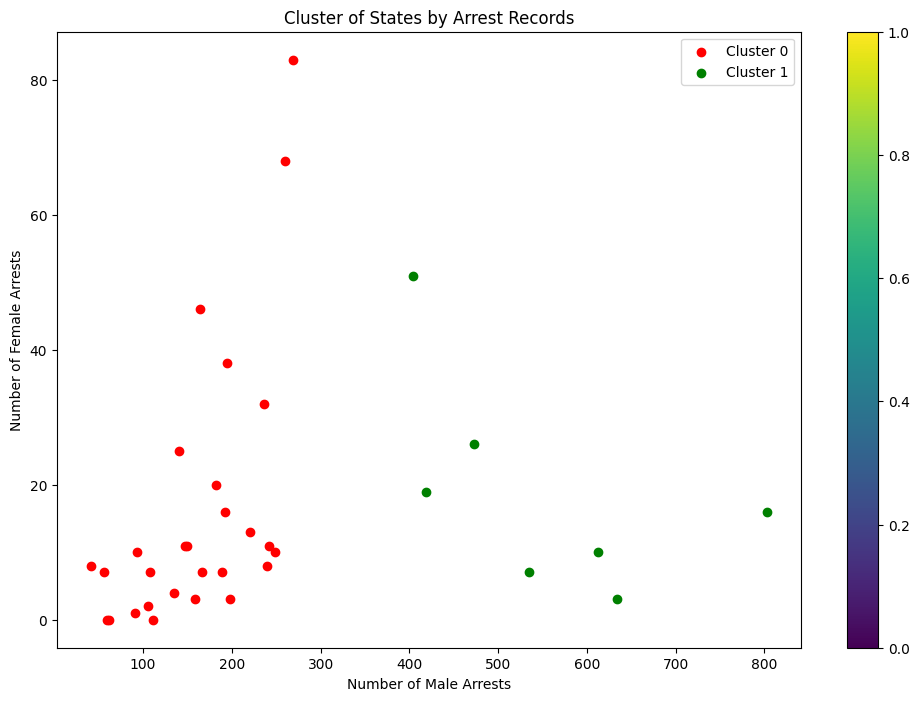

In [20]:
# the optimal number of clusters is 2
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(features)

# Add cluster results to original data
data['Cluster'] = clusters

# Print the states in each cluster
print("Listing states in each cluster:")
for i in range(2):
    states_in_cluster = data[data['Cluster'] == i]['STATE'].tolist()
    print(f"Cluster {i}: {', '.join(states_in_cluster)}")

# Plotting results with legends for each cluster
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']  # Color for each cluster
for i in range(2):
    # Select data for each cluster
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['MALE'], cluster_data['FEMALE'], color=colors[i], label=f'Cluster {i}')
plt.title('Cluster of States by Arrest Records')
plt.xlabel('Number of Male Arrests')
plt.ylabel('Number of Female Arrests')
plt.legend()  # Display legend
plt.colorbar()  # Show color scale
plt.show()


The scatter plot above visualizes the clustering of states based on the number of arrests for males and females, with data points color-coded by two clusters (Cluster 0 in red and Cluster 1 in green). Here's how to interpret the results shown in this plot:

# Cluster Characteristics

### Cluster 0 (Red):

This cluster predominantly includes states with relatively lower numbers of male and female arrests. Most of these states have male arrests ranging approximately from 50 to 300 and female arrests generally below 40.
This cluster represents states where arrest numbers are moderate, suggesting either lower crime rates or less aggressive law enforcement activity compared to Cluster 1.

### Cluster 1 (Green):

States in this cluster are characterized by a higher number of male arrests, generally above 600, with female arrests varying but generally being higher than those in Cluster 0.


The higher number of arrests in both categories may indicate regions with higher crime rates or more active law enforcement.
Key Insights

Distribution: The states are distinctly grouped into those with higher overall arrests and those with lower arrests. The separation along the axis of male arrests is quite pronounced, which suggests that the number of male arrests is a stronger differentiator for these clusters.

Arrest Patterns: The variation in arrest patterns could be influenced by socio-economic factors, law enforcement policies, population density, or crime rates which differ significantly between these clusters.

Policy Implications: Authorities and policymakers might use such an analysis to identify regions needing more law enforcement resources or community programs to address crime. Similarly, areas with fewer arrests might be studied to replicate their crime prevention strategies elsewhere.